In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy.stats as st
from scipy.spatial import ConvexHull, distance_matrix
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import trange, tqdm

import math
import random
from abc import ABC, abstractmethod
from typing import Union

from MH import *
from funcs import *

In [20]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

%matplotlib inline

plt.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 16
# plt.rcParams['legend.fontsize'] = 'medium'
# plt.rcParams['figure.titlesize'] = 'large'

In [4]:
class DatasetGenerator(ABC):
    def __init__(self, N=100):
        self.N = N
        self.x = None
        self.v = None
        self.refresh()
    
    @abstractmethod
    def refresh(self):
        pass

class G1(DatasetGenerator):
    def refresh(self):
        self.x = np.random.rand(self.N, 2)
        self.v = np.random.rand(self.N)

class G2(DatasetGenerator):
    def refresh(self):
        self.x = np.random.rand(self.N, 2)
        self.v = np.exp(np.random.randn(self.N) * 1.3 - 0.85)

In [5]:
g = G1(100)
g.refresh()

In [6]:
all_val =  []
all_num_city  = []
all_lam = np.round(np.arange(0, 1.1, 0.1), 2)

for lam in tqdm(all_lam):
    beta_schedule = getOptBetaSeq('G1', lam)
    beta = beta_schedule[0]
    inputs = {'v': g.v, 'x': g.x, 'lam': lam}
    init_state = np.random.randint(0, 2, size=len(g.v), dtype=bool)
    optim = optimizer(objective, transition, beta, init_state, **inputs)
    num_iters = 2000
    val, num_cities = optim.run(iters=num_iters, beta_schedule=beta_schedule, reset=True)
    all_val.append(val)
    all_num_city.append(np.sum(num_cities, axis=1))

Original lambda is 0.0 Corrected one is 0.0
Original lambda is 0.1 Corrected one is 0.1
Original lambda is 0.2 Corrected one is 0.2
Original lambda is 0.3 Corrected one is 0.3
Original lambda is 0.4 Corrected one is 0.4
Original lambda is 0.5 Corrected one is 0.5
Original lambda is 0.6 Corrected one is 0.6
Original lambda is 0.7 Corrected one is 0.7
Original lambda is 0.8 Corrected one is 0.8
Original lambda is 0.9 Corrected one is 0.9
Original lambda is 1.0 Corrected one is 1.0



In [7]:
def getMaxVal(val, num_cities):
    max_obj_val = np.max(val)
    corr_num_cities = num_cities[np.argmax(val)]
    return max_obj_val, corr_num_cities

54.60431190908697 95


<Figure size 640x480 with 0 Axes>

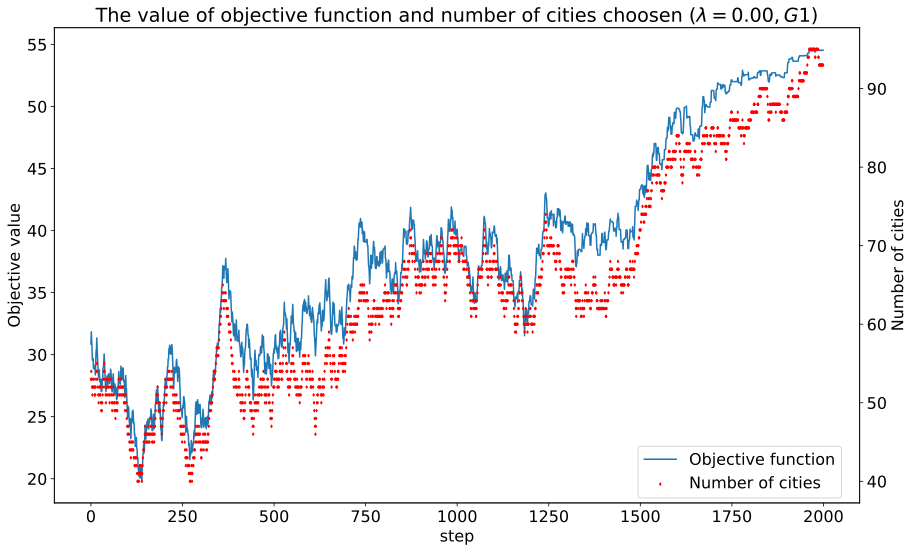

In [25]:
plt.clf()
ind = 0
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 8)
ax1.plot(range(num_iters), all_val[ind], label='Objective function')
ax1.set_xlabel('step')
ax1.set_ylabel('Objective value')
ax1.set_title(r'The value of objective function and number of cities choosen ($\lambda={0:.2f}, G1$)'.format(all_lam[ind]))

ax2 = ax1.twinx()
ax2.scatter(range(num_iters), all_num_city[ind], s=3, marker='d', color='r', label='Number of cities')
ax2.set_ylabel('Number of cities')
fig.legend(loc='lower right', bbox_to_anchor=(0.92, 0.1))
fig.tight_layout()
plt.savefig('plot_lambda_{}.png'.format(all_lam[ind]))

max_obj_val, corr_num_cities = getMaxVal(all_val[ind], all_num_city[ind])
print(max_obj_val, corr_num_cities)

23.280317099343087 92


<Figure size 640x480 with 0 Axes>

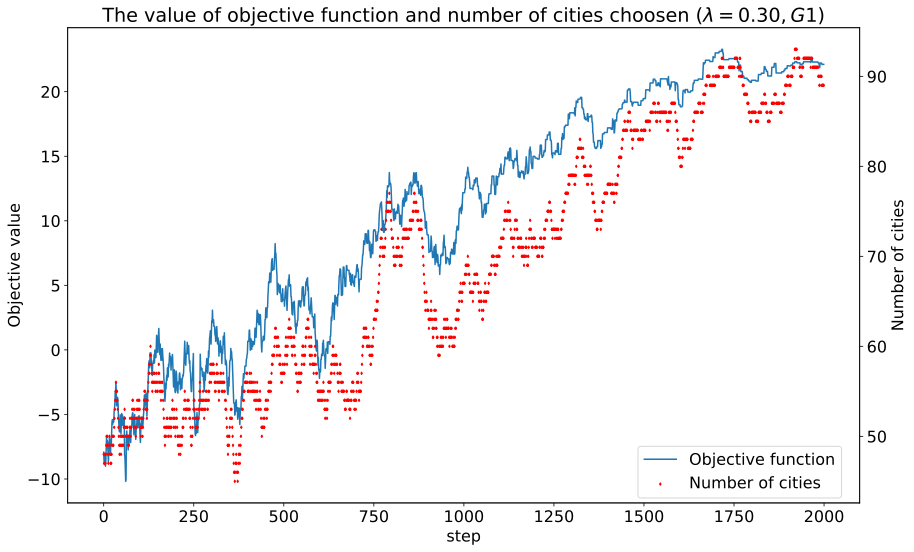

In [26]:
plt.clf()
ind = 3
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 8)
ax1.plot(range(num_iters), all_val[ind], label='Objective function')
ax1.set_xlabel('step')
ax1.set_ylabel('Objective value')
ax1.set_title(r'The value of objective function and number of cities choosen ($\lambda={0:.2f}, G1$)'.format(all_lam[ind]))

ax2 = ax1.twinx()
ax2.scatter(range(num_iters), all_num_city[ind], s=3, marker='d', color='r', label='Number of cities')
ax2.set_ylabel('Number of cities')
fig.legend(loc='lower right', bbox_to_anchor=(0.92, 0.1))
fig.tight_layout()
plt.savefig('plot_lambda_{}.png'.format(all_lam[ind]))

max_obj_val, corr_num_cities = getMaxVal(all_val[ind], all_num_city[ind])
print(max_obj_val, corr_num_cities)

-3.208494619408711 83


<Figure size 640x480 with 0 Axes>

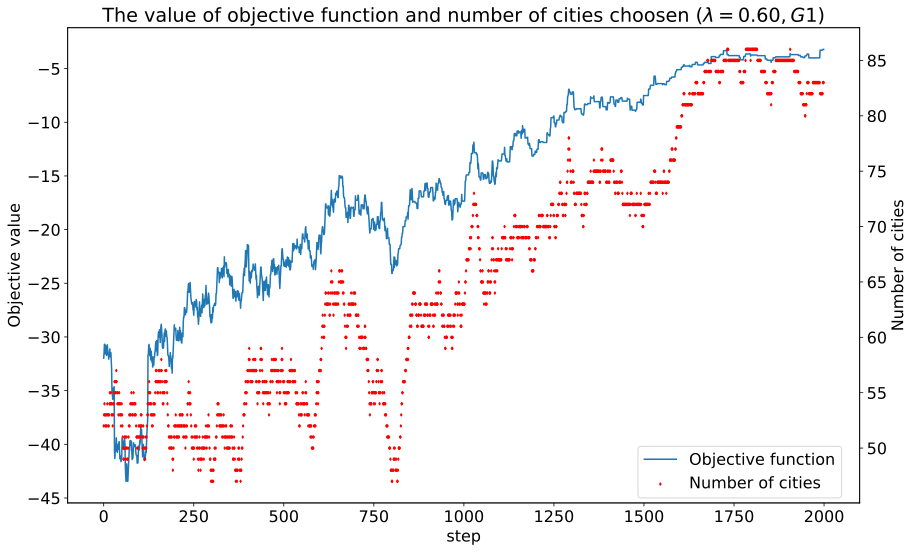

In [27]:
plt.clf()
ind = 6
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 8)
ax1.plot(range(num_iters), all_val[ind], label='Objective function')
ax1.set_xlabel('step')
ax1.set_ylabel('Objective value')
ax1.set_title(r'The value of objective function and number of cities choosen ($\lambda={0:.2f}, G1$)'.format(all_lam[ind]))

ax2 = ax1.twinx()
ax2.scatter(range(num_iters), all_num_city[ind], s=3, marker='d', color='r', label='Number of cities')
ax2.set_ylabel('Number of cities')
fig.legend(loc='lower right', bbox_to_anchor=(0.92, 0.1))
fig.tight_layout()
plt.savefig('plot_lambda_{}.png'.format(all_lam[ind]))

max_obj_val, corr_num_cities = getMaxVal(all_val[ind], all_num_city[ind])
print(max_obj_val, corr_num_cities)

-38.26795506559626 85


<Figure size 640x480 with 0 Axes>

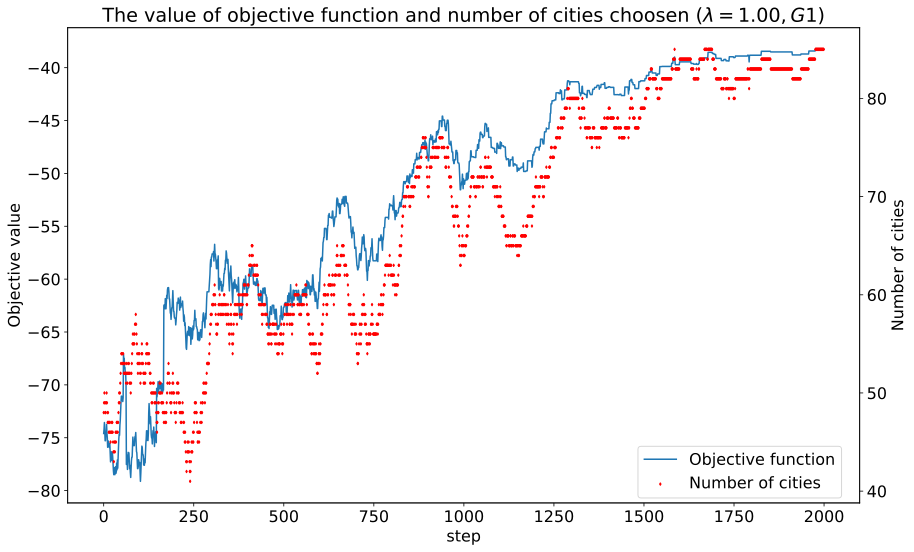

In [28]:
plt.clf()
ind = 10
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 8)
ax1.plot(range(num_iters), all_val[ind], label='Objective function')
ax1.set_xlabel('step')
ax1.set_ylabel('Objective value')
ax1.set_title(r'The value of objective function and number of cities choosen ($\lambda={0:.2f}, G1$)'.format(all_lam[ind]))

ax2 = ax1.twinx()
ax2.scatter(range(num_iters), all_num_city[ind], s=3, marker='d', color='r', label='Number of cities')
ax2.set_ylabel('Number of cities')
fig.legend(loc='lower right', bbox_to_anchor=(0.92, 0.1))
fig.tight_layout()
plt.savefig('plot_lambda_{}.png'.format(all_lam[ind]))

max_obj_val, corr_num_cities = getMaxVal(all_val[ind], all_num_city[ind])
print(max_obj_val, corr_num_cities)

In [29]:
optimal_num_cities = []
for i, l in enumerate(all_lam):
    curr_v, curr_n = getMaxVal(all_val[i], all_num_city[i])
    optimal_num_cities.append(curr_n)

Text(0, 0.5, 'Optimal number of cities')

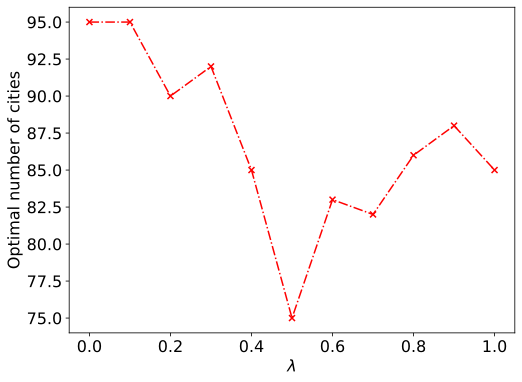

In [30]:
plt.plot(all_lam, optimal_num_cities, 'r-.')
plt.scatter(all_lam, optimal_num_cities, marker='x', color='r')
plt.xlabel(r'$\lambda$')
plt.ylabel('Optimal number of cities')